In [1]:
import neurolab as nl
import numpy as np
from numpy import genfromtxt

In [79]:
my_data = genfromtxt('ejemplo_rn.csv', delimiter=',')
#print my_data

#data = my_data[:100]
#print data

continuar = True
index = 0
auxIndex = 1
datos80 = my_data[:15]

print datos80    

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]


In [80]:
inputArrayAux = []
inputArray = []
targetArray = []

while index < len(datos80) - 1:
    inputArrayAux.append( datos80[ index ] )
    if auxIndex == 3:
        inputArray.append( inputArrayAux )
        inputArrayAux = []
        targetArray.append( datos80[ index + 1] )
        index = index - 2
        auxIndex = 0
    auxIndex+=1
    index+=1

print inputArray
print targetArray

[[1.0, 2.0, 3.0], [2.0, 3.0, 4.0], [3.0, 4.0, 5.0], [4.0, 5.0, 6.0], [5.0, 6.0, 7.0], [6.0, 7.0, 8.0], [7.0, 8.0, 9.0], [8.0, 9.0, 10.0], [9.0, 10.0, 11.0], [10.0, 11.0, 12.0], [11.0, 12.0, 13.0], [12.0, 13.0, 14.0]]
[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


In [81]:
inp = np.array( inputArray )
#entrada= inp.reshape( len(inp), 1 )
print inp

target = np.array( targetArray )
lenT = len(target)
print lenT
tar = target.reshape(lenT, 1);

print tar

[[  1.   2.   3.]
 [  2.   3.   4.]
 [  3.   4.   5.]
 [  4.   5.   6.]
 [  5.   6.   7.]
 [  6.   7.   8.]
 [  7.   8.   9.]
 [  8.   9.  10.]
 [  9.  10.  11.]
 [ 10.  11.  12.]
 [ 11.  12.  13.]
 [ 12.  13.  14.]]
12
[[  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]]


In [82]:
# Create network with 2 layers and random initialized
net = nl.net.newff([ [1, 20], [1,20] , [1, 20] ],[500, 1])

print net.ci
print net.co

#Train network - Se entrena l red neuronal
#entradas, salidas deseadas, epocas, muestras cada 10 epocas , objetivo del error 
error = net.train(inp, tar, epochs=5000, show=1000, goal=0.000002)
print error

3
1
[505.00000000000688]


In [83]:
# Simulate network
out = net.sim(inp)
print out

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


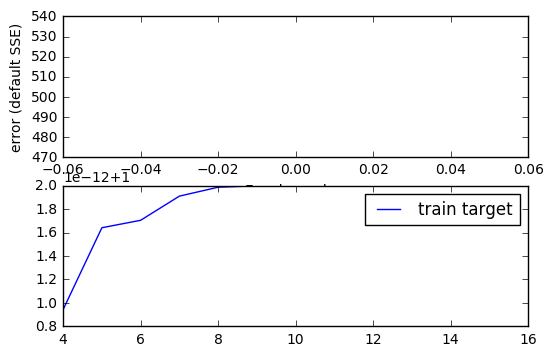

In [84]:
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default SSE)')

#Graficar el target con el out
#y2 = net.sim( inp )
#print y2

pl.subplot(212)
pl.plot(tar, out)
#pl.plot(a,b)
pl.legend(['train target', 'net output'])
pl.show()